<a href="https://colab.research.google.com/github/khalidme94/Data_Scince/blob/master/GeoTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GeoTech Employmen Excercise**

In this excercise I will analyze the most important two columns that can give a valuable recommendation.

My approch to accomplish objective is to put myself in the managers place and think as they think to foucus only on most important parameters, which can improve the business.

--------------------------------------------
**Coding Explaining**

First I import the needed libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Second, I import the data

In [8]:
customers=pd.read_csv(r'/content/drive/MyDrive/GeoTech/customers.csv')

Now I explore the dataset

In [3]:
customers.head(10)

,Unnamed: 0,PYID,INTERACTIONTYPE,PRIORITY,PXCREATEDATETIME,PYSLAGOAL,PYSLADEADLINE,TREATMENTCLOSEDDATE,PYRESOLVEDTIMESTAMP,SLATRACK,PYSTATUSWORK,LATITUDE,LONGITUDE,INCIDENTSTATUS,CLOSUREREASON,ISSUEDESCRIPTION,DEPARTMENT,MAINCLASSIFICATION,SUBCLASSIFICATION,SATISFACTION
0,0,INC-20-08-000048,Call,عالي,25-NOV-19 11.45.17.030000000 AM,25-NOV-19 01.45.17.030000000 PM,29-NOV-19 11.45.17.030000000 AM,27-NOV-19 08.41.19.857000000 PM,27-NOV-19 08.41.19.857000000 PM,Delayed,Resolved-Completed,24.440833,39.616819,تمت معالجة البلاغ بشكل نهائي,لا تخص التنسيق,يفيد المبلغ بوجود حفريات بدون وضع لوحات ووسائل...,وكالة الجودة أمانة المدينة المنورة,الطرق والأرصفة,الحفريات,8
1,1,INC-20-08-000050,Call,عالي,27-NOV-19 08.30.54.047000000 PM,27-NOV-19 10.30.54.047000000 PM,01-DEC-19 08.30.54.047000000 PM,27-NOV-19 08.56.06.580000000 PM,27-NOV-19 08.56.06.580000000 PM,Not Delayed,Resolved-Completed,23.813656,38.845296,تمت معالجة البلاغ بشكل نهائي,تم التواصل مع الرقم المسجل في ا+,تفيد المواطن بانها تطلب مكافحة الكلاب العقوره,إدارة الخدمات بلدية بدر,الحيوانات والحشرات,مكافحة الآفات والحشرات و الحيوانات السائبة,4
2,2,INC-20-08-000051,Call,متوسط,20-NOV-19 10.50.35.837000000 AM,20-NOV-19 04.50.35.837000000 PM,24-NOV-19 10.50.35.837000000 AM,27-NOV-19 09.03.24.877000000 PM,27-NOV-19 09.03.24.877000000 PM,Delayed,Resolved-Completed,24.444566,39.650385,تمت معالجة البلاغ بشكل نهائي,تم التواصل مع المواطن والانتهاء+,وضح المواطن بوجود بلاغ سابق بنظام امانة المدين...,إدارة الخدمات بلدية العوالي,النظافة,حاويات النفايات,3
3,3,INC-20-08-000052,Social Media,عالي,27-NOV-19 07.55.25.183000000 PM,27-NOV-19 09.55.25.183000000 PM,01-DEC-19 07.55.25.183000000 PM,27-NOV-19 09.09.34.623000000 PM,27-NOV-19 09.09.34.623000000 PM,Not Delayed,Resolved-Completed,24.427324,39.584394,تمت معالجة البلاغ بشكل نهائي,الموقع تابع الى وكالة المشاريع +,لسلام عليكم ورحمة الله وبركاته أخر بلاغ برقم /...,وكالة الجودة أمانة المدينة المنورة,الطرق والأرصفة,الحفريات,3
4,4,INC-20-08-000027,Call,متوسط,25-NOV-19 03.09.51.670000000 PM,25-NOV-19 09.09.51.670000000 PM,29-NOV-19 03.09.51.670000000 PM,26-NOV-19 10.11.33.010000000 AM,26-NOV-19 10.11.33.010000000 AM,Not Delayed,Resolved-Completed,24.862532,40.494209,تمت معالجة البلاغ بشكل نهائي,تم التأكد من سعر الحليب بجميع ا+,مخالفة سعر بيع _x000D_\n_x000D_\n_x000D_\nصيد...,إدارة الخدمات بلدية الحناكية,الأسواق والمتاجر,مخالفات المحلات و الأسواق,2
5,5,INC-20-08-000037,Call,عالي,25-NOV-19 08.37.29.450000000 AM,25-NOV-19 10.37.29.450000000 AM,29-NOV-19 08.37.29.450000000 AM,27-NOV-19 08.28.44.750000000 PM,27-NOV-19 08.28.44.750000000 PM,Delayed,Resolved-Completed,24.427982,39.495306,تمت معالجة البلاغ بشكل نهائي,تم تسليم الموقع للمقاول,تم الحفر لتركيب اعمدة الانارة ثم تم ترك الحفر ...,وكالة الجودة أمانة المدينة المنورة,الطرق والأرصفة,الحفريات,6
6,6,INC-20-08-000042,Call,عالي,26-NOV-19 08.07.01.270000000 AM,26-NOV-19 10.07.01.270000000 AM,30-NOV-19 08.07.01.270000000 AM,27-NOV-19 08.38.02.203000000 PM,27-NOV-19 08.38.02.203000000 PM,Delayed,Resolved-Completed,24.450264,39.595804,تمت معالجة البلاغ بشكل نهائي,تم الوقوف على الموقع ، حفرية كه+,يفيد المبلغ انه لم يتم اغلاق الحفرية بعد الانت...,وكالة الجودة أمانة المدينة المنورة,الطرق والأرصفة,الحفريات,2
7,7,INC-20-08-000046,Call,عالي,25-NOV-19 11.15.39.230000000 AM,25-NOV-19 01.15.39.230000000 PM,29-NOV-19 11.15.39.230000000 AM,27-NOV-19 08.38.18.670000000 PM,27-NOV-19 08.38.18.670000000 PM,Delayed,Resolved-Completed,24.477221,39.694326,تمت معالجة البلاغ بشكل نهائي,تم انهاء الملاحضة,اغلاق مداخل المنازل,وكالة الجودة أمانة المدينة المنورة,المباني والتعديات,تعدي على ممتلكات خاصة او حكومية,7
8,8,INC-20-08-000035,Call,عالي,26-NOV-19 08.47.06.700000000 PM,26-NOV-19 10.47.06.700000000 PM,30-NOV-19 08.47.06.700000000 PM,27-NOV-19 11.04.33.800000000 AM,27-NOV-19 11.04.33.800000000 AM,Delayed,Resolved-Completed,24.510008,39.719809,تمت معالجة البلاغ بشكل نهائي,تم الوقوف ع البلاغ وتلاحظ وجود +,يفيد المواطن بوجود ملحمة تبيع لحم مجهول ولا يب...,إدارة الخدمات بلدية العاقول,الأسواق والمتاجر,مخالفات المطاعم ومحلات المواد الغذائية,0
9

I decided to choose three parameters:

1.   Department
2.   MainClassification
3.   Satisfaction

I expect these will give me mesurements of important indicators:


*   Each department performance: Weaknesses and straighnths
*   Most main classification that slowdown the business
*   Customers satisfaction of the results






Now I Explore main classifications of complaints , so it will give an idea of complaints categories

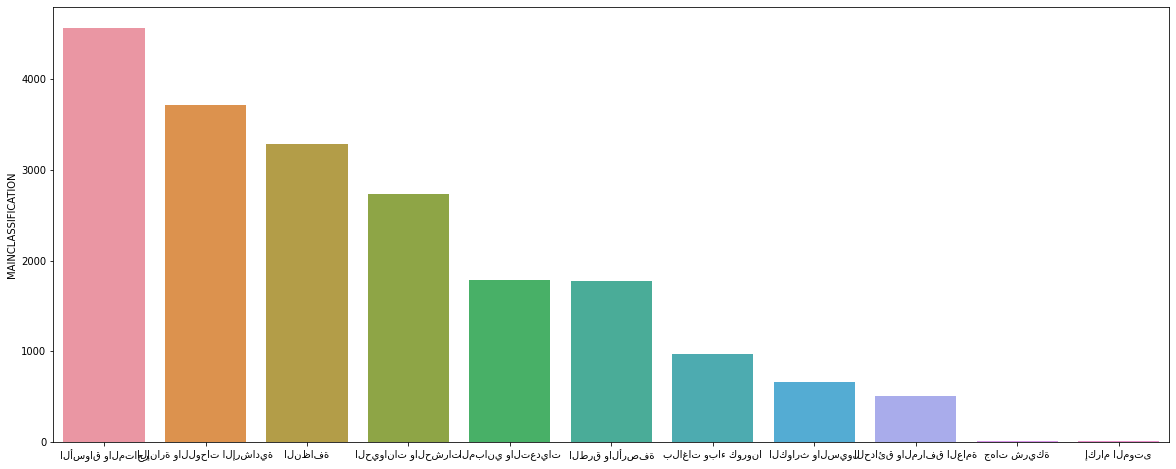

In [27]:
plt.figure(figsize=(20,8))
sns.barplot(x=customers['MAINCLASSIFICATION'].value_counts().index,y=customers['MAINCLASSIFICATION'].value_counts())


In [28]:
customers['MAINCLASSIFICATION'].value_counts()

الأسواق والمتاجر              4568
الإنارة واللوحات الإرشادية    3715
النظافة                       3282
الحيوانات والحشرات            2733
المباني والتعديات             1784
الطرق والأرصفة                1775
بلاغات وباء كورونا             965
الكوارث والسيول                661
الحدائق والمرافق العامة        503
جهات شريكة                       8
إكرام الموتى                     6
Name: MAINCLASSIFICATION, dtype: int64

As seen in the above analysis, we have 11 category of  complaints main classifications.

Now I will measure the customer satisfaction of each category to know which one need to be devoloped more

In [40]:
category_satisfaction = customers[['MAINCLASSIFICATION','SATISFACTION']]

In [47]:
category_satisfaction= category_satisfaction.pivot_table(index='MAINCLASSIFICATION',values='SATISFACTION',aggfunc='mean')
category_satisfaction.sort_values(by='SATISFACTION')

,SATISFACTION
MAINCLASSIFICATION,
الكوارث والسيول,4.295008
الحدائق والمرافق العامة,4.393638
النظافة,4.398842
الحيوانات والحشرات,4.437248
بلاغات وباء كورونا,4.461140
الطرق والأرصفة,4.493521
جهات شريكة,4.500000
الأسواق والمتاجر,4.532399
المباني والتعديات,4.553812


As seen in the above table, it seems all categories have low customers satisfaction.

Now, I go for more deep and try to find out how each department perform with these complaints.

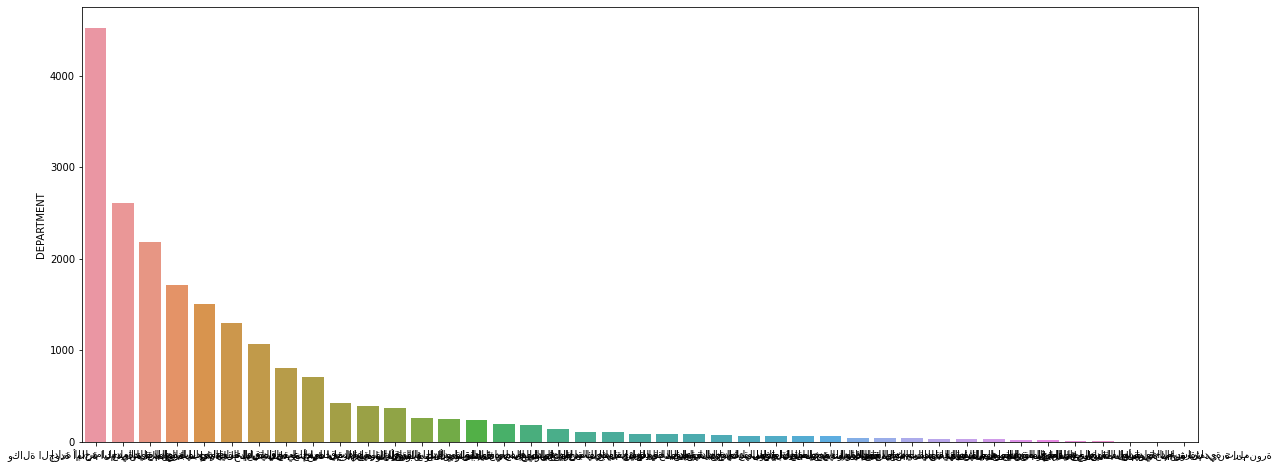

In [48]:
plt.figure(figsize=(20,8))
sns.barplot(x=customers['DEPARTMENT'].value_counts().index,y=customers['DEPARTMENT'].value_counts())


In [49]:
customers['DEPARTMENT'].value_counts()

وكالة الجودة أمانة المدينة المنورة              4522
إدارة الخدمات بلدية العوالي                     2610
إدارة الخدمات بلدية البيداء                     2187
إدارة الخدمات بلدية قباء                        1716
إدارة الخدمات بلدية العقيق                      1511
إدارة الخدمات بلدية ينبع                        1295
إدارة الخدمات بلدية أحد                         1069
إدارة النظافه بلديه قباء                         810
إدارة الخدمات بلدية العيون                       712
إدارة الخدمات بلدية العاقول                      420
إدارة الخدمات بلدية العلا                        393
إدارة المراقبه والأسواق بلديه قباء               370
إدارة الخدمات بلدية بدر                          264
إداره المراقبه والأسواق بلديه العيون             255
إدارة الخدمات بلدية ينبع النخل                   239
إداره النظافه بلديه العيون                       196
إدارة الخدمات بلدية الحناكية                     185
إدارة الخدمات بلدية ابيار الماشي                 139
إدارة الخدمات بلدية خيبر                      

From the previous figure and list, it seems that 'وكالة الجودة أمانة المدينة المنورة ' has the highest number of complaints and that an indecation of something is going wrong with them.

Now I make a pivot table of each department to show the customers satisfaction of each complaint category the department has.

This will show where each department is facing problems.


In [56]:
department_satisfaction = customers[['DEPARTMENT','MAINCLASSIFICATION','SATISFACTION']]

In [73]:
department_satisfaction= department_satisfaction.pivot_table(index=['DEPARTMENT','MAINCLASSIFICATION'],values='SATISFACTION',aggfunc='mean')
department_satisfaction=department_satisfaction.sort_values(by=['DEPARTMENT','SATISFACTION'])
department_satisfaction.head(100)


SATISFACTION
DEPARTMENT                                   MAINCLASSIFICATION                      
إدارة الحراسات الأمنية امانة المدينة المنورة جهات شريكة                      5.000000
إدارة الخدمات بلدية أحد                      الحدائق والمرافق العامة         3.814815
                                             الحيوانات والحشرات              4.219251
                                             بلاغات وباء كورونا              4.362069
                                             النظافة                         4.410480
...                                                                               ...
إدارة الخدمات بلدية العلا                    المباني والتعديات               4.277778
                                             الحيوانات والحشرات              4.385965
                                             الكوارث والسيول                 4.500000
                                             بلاغات وباء كورونا              4.615385
                                             الإنارة واللوحات الإرشادية      4.786325

[100 rows x 1 columns]

The previous table showed presiously the performance of each department and which type of complaint it have problems with and what is the average customers satisfaction

Now I should save and export the outcom

In [80]:
department_satisfaction.to_excel('Department_Satisfaction.xlsx', index = False, header=True)

**Conclusion**

In the conclusion I recommend to focus more in the department 'وكالة الجودة أمانة المدينة المنورة' as it has the highest number of complaints 